In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
import numpy as np
from random import sample
import pandas as pd
import matplotlib.pyplot as plt

# Iris data set

Este conjunto de datos registra mediciones de 

* Largo y ancho del sépalo
* Largo y ancho del pétalo

de tres especies diferentes de flores

1. Virginica
2. Versicolor
3. Setosa

<img src="iris_types.jpg"/>

In [2]:
iris = datasets.load_iris()
print iris.data[:10,]
print "##############"
print iris.target

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
##############
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
len(iris.target)

150

## Observaciones

* Los datos tienen 4 dimensiones (cada observación está definida por 4 variables)
* Tenemos disponible una etiqueta (target que indica la especie a la que pertenece cada observación)



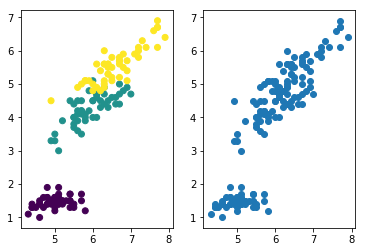

In [4]:
plt.subplot(121)
plt.scatter(iris.data[:,0], iris.data[:,2], c=iris.target)
plt.subplot(122)
plt.scatter(iris.data[:,0], iris.data[:,2])
plt.show()

# Agrupamiento

En el conjunto **iris** sabemos que los datos están estructurados en tres grupos correspondientes a cada especie. 

En muchas aplicaciones, es de especial interés formar grupos a partir de los datos. Estos grupos deben contener observaciones con características similares. Por ejemplo

* Supón que disponemos de un conjunto de datos con la codificación genética de un gran grupo de seres humanos, buscamos construir grupos con características genéticas similares
* Es común buscar agrupar a los usuarios de un sitio web de acuerdo a sus características: datos obtenidos de una encuesta, o patrones de comportamiento en el portal 



## K-Medias

Uno de los métodos más ampliamente utilizados para agrupar datos es el de *k-medias*. Este método funciona de la siguiente forma

1. $k = k_0$ (se establece el número de medias/grupos)
2. Se elige aleatoriamente un conjunto de $k$ medias: $K = \{\mu_1, \mu_2, \cdots, \mu_k\}$
3. Para $i = 1 \ldots \text{itmax}$:  
    4. Agrupar cada observación a la media más cercana
    5. Actualizar las medias


### Demostración del algoritmo de k-medias

#### Construcción del conjunto de datos

In [5]:
#construímos el conjunto de características
X = pd.DataFrame({"x_1": pd.Series(iris.data[:,0]), "x_2":pd.Series(iris.data[:,2])})
(N, d) = X.shape
print (N, d)
X.head()

(150, 2)


,x_1,x_2
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


#### Inicio

In [6]:
#iniciamos el número de grupos
k = 3

np.random.seed(0)
# seleccionamos tres medias aleatoriamente (pueden ser tres observaciones)
s = sample(range(N),3)
ms = X.iloc[s,]
print s
print ms

[29, 98, 69]
    x_1  x_2
29  4.7  1.6
98  5.1  3.0
69  5.6  3.9


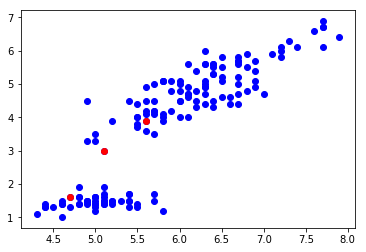

In [7]:
plt.scatter(X["x_1"], X["x_2"],c="b")
plt.scatter(ms["x_1"], ms["x_2"],c="r")
plt.show()

#### Primera iteración

In [14]:
# evaluamos la distancia de cada observación a cada media

X["d1"] = (X["x_1"]-ms.iloc[0]["x_1"])**2+(X["x_2"]-ms.iloc[0]["x_2"])**2
X["d2"] = (X["x_1"]-ms.iloc[1]["x_1"])**2+(X["x_2"]-ms.iloc[1]["x_2"])**2
X["d3"] = (X["x_1"]-ms.iloc[2]["x_1"])**2+(X["x_2"]-ms.iloc[2]["x_2"])**2

X.head()

,x_1,x_2,d1,d2,d3,lab
0,5.1,1.4,0.012932,3.525625,14.248391,1
1,4.9,1.4,0.015332,3.525625,14.774224,1
2,4.7,1.3,0.120532,3.990625,16.104849,1
3,4.6,1.5,0.166132,3.310625,15.008183,1
4,5.0,1.4,0.004132,3.515625,14.501308,1


In [15]:
# agrupamos los datos identificando la media con la menor distancia

conditions = [
    ((X["d1"] < X["d2"]) & (X["d1"] < X["d3"])),
    ((X["d2"] < X["d1"]) & (X["d2"] < X["d3"])),
    ((X["d3"] < X["d1"]) & (X["d3"] < X["d2"]))]
choices = ['1', '2', '3']

X['lab'] = np.select(conditions, choices, default='0')
X

,x_1,x_2,d1,d2,d3,lab
0,5.1,1.4,0.012932,3.525625,14.248391,1
1,4.9,1.4,0.015332,3.525625,14.774224,1
2,4.7,1.3,0.120532,3.990625,16.104849,1
3,4.6,1.5,0.166132,3.310625,15.008183,1
4,5.0,1.4,0.004132,3.515625,14.501308,1
5,5.4,1.7,0.210932,2.640625,11.555266,1
6,4.6,1.4,0.168932,3.675625,15.712974,1
7,5.0,1.5,0.001332,3.150625,13.796516,1
8,4.4,1.4,0.371332,3.875625,16.438808,1
9,4.9,1.5,0.012532,3.160625,14.069433,1


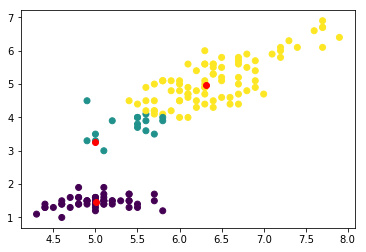

In [16]:
plt.scatter(X["x_1"], X["x_2"], c=X["lab"])
plt.scatter(ms["x_1"], ms["x_2"],c="r")
plt.show()

In [17]:
# Reevaluamos las medias

xs_1 = X[X["lab"] == "1"]
xs_2 = X[X["lab"] == "2"]
xs_3 = X[X["lab"] == "3"]

ms.iloc[0]["x_1"] = sum(xs_1["x_1"])/len(xs_1["x_1"])
ms.iloc[0]["x_2"] = sum(xs_1["x_2"])/len(xs_1["x_2"])

ms.iloc[1]["x_1"] = sum(xs_2["x_1"])/len(xs_2["x_1"])
ms.iloc[1]["x_2"] = sum(xs_2["x_2"])/len(xs_2["x_2"])

ms.iloc[2]["x_1"] = sum(xs_3["x_1"])/len(xs_3["x_1"])
ms.iloc[2]["x_2"] = sum(xs_3["x_2"])/len(xs_3["x_2"])

ms

,x_1,x_2
29,5.006000,1.46400
98,5.387500,3.75000
69,6.428571,5.12619


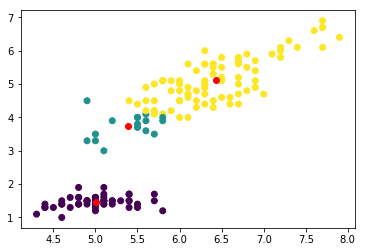

In [18]:
plt.scatter(X["x_1"], X["x_2"], c=X["lab"])
plt.scatter(ms["x_1"], ms["x_2"],c="r")
plt.show()

**Validación**

Comparamos el agrupamiento que obtuvimos en la primera iteración de k-medias y la verdadera clasificación



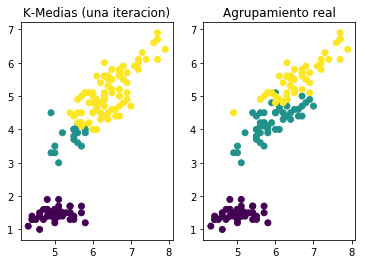

In [19]:
plt.subplot(121)
plt.scatter(X["x_1"], X["x_2"], c=X["lab"])
plt.title("K-Medias (una iteracion)")
plt.subplot(122)
plt.scatter(X["x_1"], X["x_2"], c=iris.target)
plt.title("Agrupamiento real")
plt.show()

In [20]:
pd.crosstab(X["lab"],iris.target)

col_0,0,1,2
lab,,,
1,50,0,0
2,0,15,1
3,0,35,49


## K-Medias (sklearn)

In [21]:
model = KMeans(n_clusters = 3)
model.fit(X)
labs = model.predict(X)
centroids = model.cluster_centers_
print labs
print centroids

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 1 1 1 0 1 1 1 0
 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0
 0 0]
[[ 6.          4.51285714 10.782972    3.03169643  0.8109831   2.78571429]
 [ 6.93448276  5.92068966 24.00985614 11.170625    1.7093032   3.        ]
 [ 5.00784314  1.49411765  0.19473592  3.36542892 14.01068659  1.01960784]]


col_0   0   1   2
row_0            
0       0  49  21
1       0   0  29
2      50   1   0


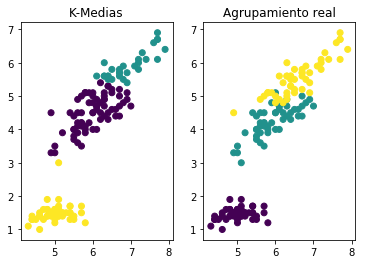

In [22]:
print pd.crosstab(labs, iris.target)

plt.subplot(121)
plt.scatter(X["x_1"], X["x_2"], c=labs)
plt.title("K-Medias")
plt.subplot(122)
plt.scatter(X["x_1"], X["x_2"], c=iris.target)
plt.title("Agrupamiento real")
plt.show()

In [23]:
#usamos todas las variables

model = KMeans(n_clusters = 3)
model.fit(iris.data) 
labs = model.predict(iris.data)
centroids = model.cluster_centers_
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

col_0   0   1   2
row_0            
0       0  48  14
1      50   0   0
2       0   2  36


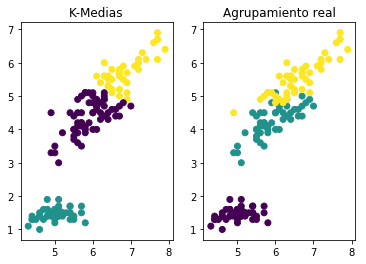

In [24]:
print pd.crosstab(labs, iris.target)

plt.subplot(121)
plt.scatter(X["x_1"], X["x_2"], c=labs)
plt.title("K-Medias")
plt.subplot(122)
plt.scatter(X["x_1"], X["x_2"], c=iris.target)
plt.title("Agrupamiento real")
plt.show()

### K-Medias aplicado a una imagen

In [25]:
import sys
sys.path.insert(0, 'C:\\Users\\fgome\\Documents\\workspace\\Imagenes\\')

from manejo_imagenes import *

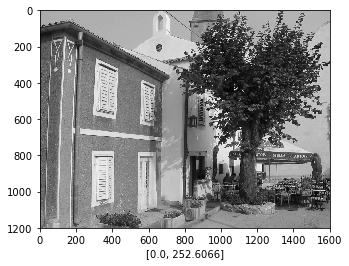

In [26]:
I = cargaImagenEscGris("croatia-02.jpg")
muestraImagen(I)

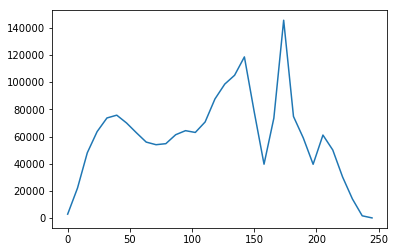

In [27]:
#muestra el histograma de frecuencias
histograma(I)

In [34]:
#Aplica k-medias a los pixeles de la imagen
model = KMeans(n_clusters = 16)
s = sample(np.ndarray.flatten(I), 1000)
s = [[i] for i in s]
model.fit(s)
centroids = model.cluster_centers_
centroids

array([[ 64.25048393],
       [189.42678406],
       [137.15390278],
       [ 35.99140308],
       [208.84979455],
       [103.62925918],
       [161.55861364],
       [ 80.60686604],
       [ 19.15616557],
       [176.09491485],
       [ 50.60320769],
       [126.0878831 ],
       [115.32119831],
       [148.35214824],
       [223.83862558],
       [ 93.77487308]])

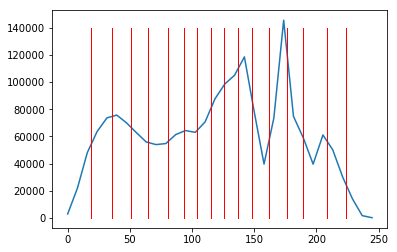

In [35]:
histograma(I, show=False)
for c in centroids:
    plt.plot([c[0],c[0]], [0,140000],c="r", linewidth=1)
plt.show()

In [36]:
# Cambia la intensidad de cada pixel
(ren, col) = I.shape
Ip = np.zeros(I.shape)

for r in range(ren):
    for c in range(col):
        #identifica la mínima distancia
        dmin = None
        clr = None
        for v in centroids:
            if dmin == None or abs(I[r,c]-v[0]) < dmin:
                dmin = abs(I[r,c]-v[0])
                clr = v[0]
        Ip[r,c] = clr

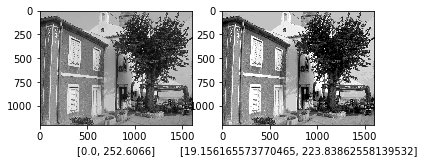

In [37]:
plt.subplot(121)
muestraImagen(I,show=False)
plt.subplot(122)
muestraImagen(Ip,show=False)
plt.show()